### Data preprocessing

In [1]:
import pandas as pd
import numpy as np

df_cs = pd.read_csv('covid_stocks_combined.csv')

#print(df_cs.describe)

#print(df_cs.isnull().sum())

df_cs = df_cs.drop(['Adj Close', 'Open', 'High', 'Low', 'Volume'], axis=1)

print(df_cs)


           Date  Confirmed cases   Deaths  Recovered  Daily New Cases  \
0    2020-01-22                1        0          0                0   
1    2020-01-23                1        0          0                0   
2    2020-01-24                2        0          0                1   
3    2020-01-27                5        0          0                0   
4    2020-01-28                5        0          0                0   
..          ...              ...      ...        ...              ...   
784  2023-03-03        103648690  1122165          0            58933   
785  2023-03-06        103655539  1122181          0             8564   
786  2023-03-07        103690910  1122516          0            35371   
787  2023-03-08        103755771  1123246          0            64861   
788  2023-03-09        103802702  1123836          0            46931   

     Daily Deaths  Active Cases        Close  
0               0             1  3321.750000  
1               0            

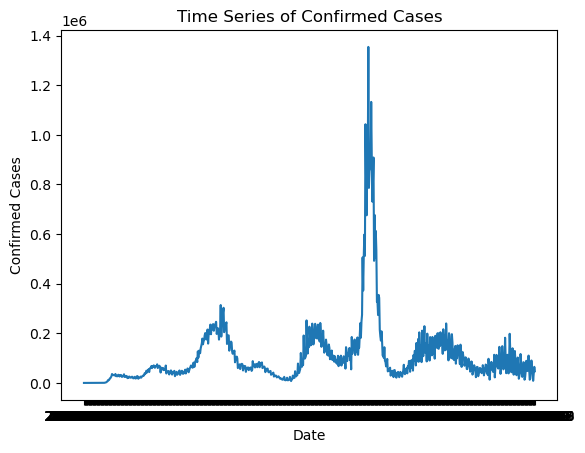

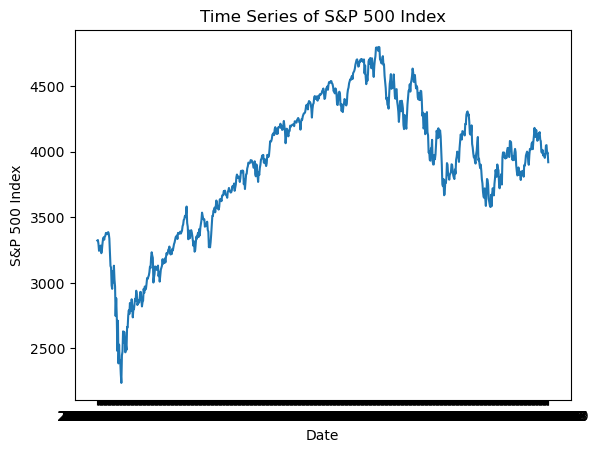

In [2]:
import matplotlib.pyplot as plt

#df_cs = df_cs.set_index('Date')
#df_cs = df_cs.loc['22-01-2020':'01-04-2021']

plt.plot(df_cs['Date'], df_cs['Daily New Cases'])
plt.title('Time Series of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

plt.plot(df_cs['Date'], df_cs['Close'])
plt.title('Time Series of S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index')
plt.show()


### Building a LinearRegression model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

'''
df_cs['Date'] = pd.to_datetime(df_cs['Date'])

# filter the DataFrame to keep only the rows before the specified date
cutoff_date = pd.to_datetime('2020-12-14')
df_cs = df_cs[df_cs['Date'] < cutoff_date]
'''
y = df_cs['Close']
X = df_cs[['Daily New Cases', 'Daily Deaths']]

print(X)

print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the model's accuracy
accuracy = model.score(X_test, y_test)
print("Model accuracy:", accuracy)

# print the coefficients of the model
print("Coefficients:", model.coef_)



reg = LinearRegression().fit(X, y)

#print('accuracy')
accuracy = reg.score(X, y)
print("Model accuracy:", accuracy)
print('R-squared value:', reg.score(X, y))
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)


     Daily New Cases  Daily Deaths
0                  0             0
1                  0             0
2                  1             0
3                  0             0
4                  0             0
..               ...           ...
784            58933           507
785             8564            47
786            35371           335
787            64861           730
788            46931           590

[789 rows x 2 columns]
0      3321.750000
1      3325.540039
2      3295.469971
3      3243.629883
4      3276.239990
          ...     
784    4045.639893
785    4048.419922
786    3986.370117
787    3992.010010
788    3918.320068
Name: Close, Length: 789, dtype: float64
Model accuracy: 0.09816208320554998
Coefficients: [0.00144591 0.02002273]
Model accuracy: 0.14738013578930198
R-squared value: 0.14738013578930198
Coefficient: [0.00144658 0.00779876]
Intercept: 3715.694080916593


### Based on increase and decrease of stocks

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a new binary column indicating whether stock prices increased or decreased
df_cs['Stock Increase'] = (df_cs['Close'].shift(-1) > df_cs['Close']).astype(int)

df_cs['Date'] = pd.to_datetime(df_cs['Date'])

# filter the DataFrame to keep only the rows before the specified date
cutoff_date = pd.to_datetime('2020-12-14')
df_cs = df_cs[df_cs['Date'] < cutoff_date]

df_cs[['Daily New Cases', 'Daily Deaths']] = df_cs[['Daily New Cases', 'Daily Deaths']].clip(lower=0)

# Define the features and target
#X = df_cs[['Confirmed cases', 'Deaths', 'Recovered', 'Daily New Cases', 'Daily Deaths', 'Active Cases']]
#X = df_cs[['Confirmed cases', 'Deaths', 'Daily New Cases', 'Daily Deaths']]
#X = df_cs[['Daily New Cases', 'Daily Deaths']]
X = df_cs[['Daily New Cases', 'Daily Deaths', 'Active Cases']]
#print(X)



y = df_cs['Stock Increase']

print(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



'''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_cs['Daily New Cases'][:-1].values.reshape(-1, 1)
y = np.where(df_cs['Close'][1:].values > df_cs['Close'][:-1].values, 1, 0)
'''


0      1
1      0
2      0
3      1
4      0
      ..
222    1
223    0
224    0
225    0
226    0
Name: Stock Increase, Length: 227, dtype: int32
Accuracy: 0.5652173913043478


"\nimport numpy as np\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\nX = df_cs['Daily New Cases'][:-1].values.reshape(-1, 1)\ny = np.where(df_cs['Close'][1:].values > df_cs['Close'][:-1].values, 1, 0)\n"